<a href="https://colab.research.google.com/github/Rushabhbhagat08/InternSavy/blob/main/Graduate_Admissions_from_an_Indian_perspective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u>**Project name: Graduate Admissions from an Indian perspective**</u>

#**Problem statment :**
A graduate application is to be completed by a student who wants to enroll in a Master's or doctoral degree. A graduate application will be reviewed by the department that the student applies to along with a Graduate Program Director and/or an admissions committee. So in this dataset we will predict the Graduate Admissions from an Indian perspective.

##**GitHub Link:**

#Let's Begin !

## ***1. Know Your Data***

### Import Libraries

In [2]:
# import some library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error,accuracy_score
from sklearn.linear_model import LassoLars,LinearRegression,LogisticRegression,Ridge,Lasso

### Dataset Loading

In [3]:
# read the data
student_data=pd.read_csv("/content/drive/MyDrive/InternSavy/Graduate Admissions from an Indian perspective/Admission_Predict_Ver1.1.csv")

### Dataset First View

In [4]:
# print first 5 rows
student_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
#print last 5 rows
student_data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


### Dataset Rows & Columns count

In [6]:
#Dataset shape and size
rows=student_data.shape[0]
columns=student_data.shape[1]
print(f"The number of rows is {rows} and number of columns is {columns}.")

The number of rows is 500 and number of columns is 9.


### Dataset Information

In [7]:
# information of the dataset
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


###Missing Values/Null Values

In [8]:
# see the null or missing values
student_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

1. isnull is the function check for the null values in the dataset
2. sum is the function gives the total number of missing or NaN values in the columns
3. There are no missing or null values in the dataset

In [9]:
# count the unique value in the dataset
student_data['Serial No.'].value_counts()

1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: Serial No., Length: 500, dtype: int64

## ***2. Understanding Your Variables***

In [10]:
# description of the dataset
student_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


##Varible Description

In [11]:
# see the columns in tha dataset
student_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

##**3. Expolatory Data Analysis(EDA)**

<Axes: >

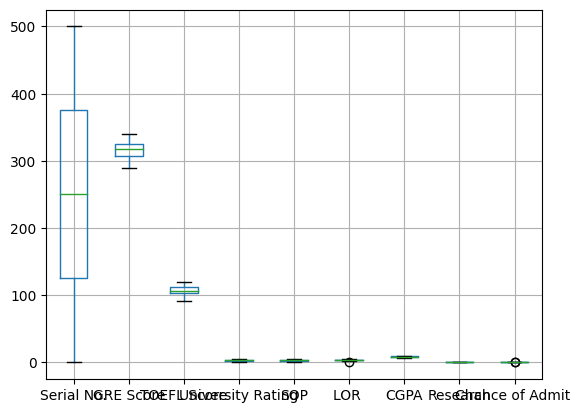

In [12]:
# plot the boxplot for for check outluers
student_data.boxplot()

<Axes: >

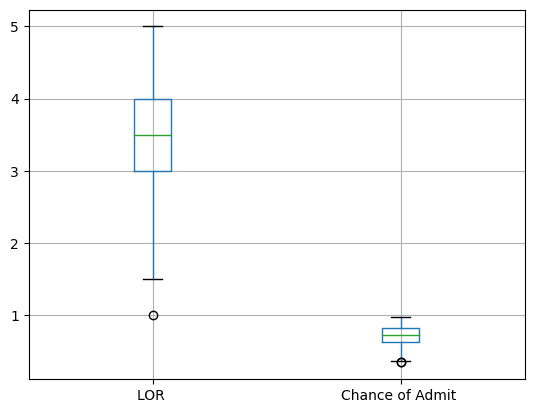

In [13]:
# plot boxplot for for two columns
student_data.boxplot(column=['LOR ','Chance of Admit '])

From the Boxplots is the evidant that LOR and Chance of Admit have the outliers values.

##Removing outliers using IQR method


In [14]:
# droping serial no. column from the dataset not required for the prediction
data=student_data.copy()
data.drop(['Serial No.'],axis=1, inplace=True)

In [15]:
# Calculate Quartile Of each feature
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [16]:
#identity the outliers from the dataset
df_out=data[((data < (Q1-1.5*IQR))| (data >(Q3+1.5*IQR))).any(axis=1)]
df_out.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


There Are three outliers shown above

In [17]:
# removing Outliers from the data
df_out=data[~((data < (Q1-1.5*IQR))| (data >(Q3+1.5*IQR))).any(axis=1)]
student_data=df_out.copy()
print(student_data.shape)

(497, 8)


Text(0.5, 0, 'Chances')

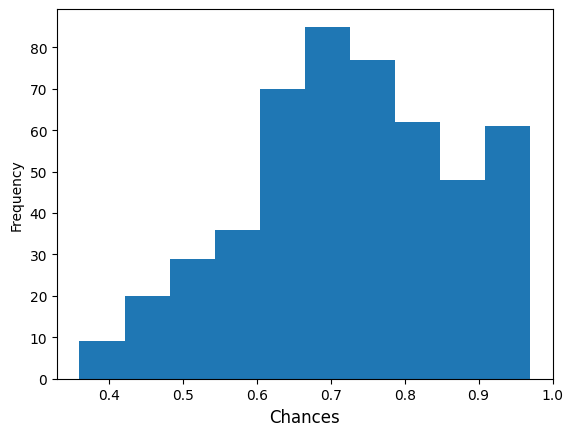

In [18]:
#plot histrogram
student_data['Chance of Admit '].plot.hist()
plt.xlabel("Chances",fontsize=12)

Text(0.5, 0, 'Rating')

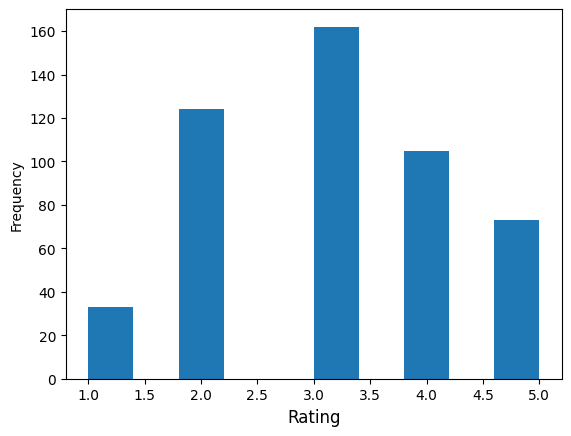

In [19]:
#plot histrogram
student_data['University Rating'].plot.hist()
plt.xlabel('Rating',fontsize=12)

1. less number of student have less rating.
2. maximum student getting rating between 3 to 3.5.

In [20]:
#unique value count for research
student_data['Research'].value_counts()

1    280
0    217
Name: Research, dtype: int64

280 student have Reserch experince and 217 student student haven't.

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

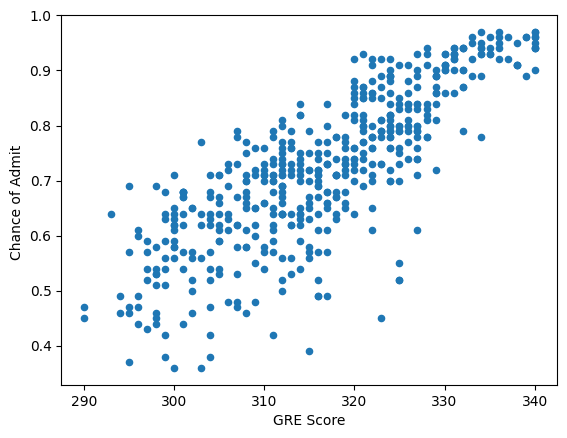

In [21]:
#scatter plot
student_data.plot.scatter('GRE Score','Chance of Admit ')

In [47]:
#calculate the GRE score
GRE_score=student_data['GRE Score'].corr(student_data['Chance of Admit '])*100

1. GRE score has strong positive correlation with target varible.
2. More the GRE score, More possibility to admit.

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

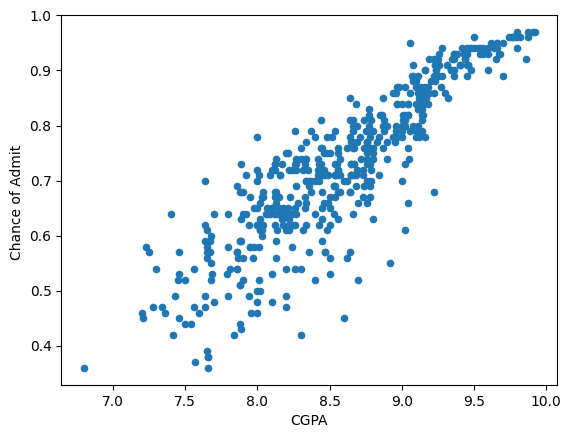

In [23]:
# scatterplot
student_data.plot.scatter('CGPA','Chance of Admit ')

In [48]:
#total CGPA
CGPA_score=student_data['CGPA'].corr(student_data['Chance of Admit '])*100

1. Maximum CGPA Define the chance of admit

In [49]:
#TOEFL Score
TODEL_score=student_data['TOEFL Score'].corr(student_data['CGPA'])*100

In [50]:
CGPA_Score=student_data['CGPA'].corr(student_data['GRE Score'])*100

1. Compare to the GRE, TOFEL is less correlation with Chance of Admit.
2. TOFEL Score also having Positive Correlaion with Chance of Admit.
3. More the CGPA, Student definately get a good score in GRE and TOFEL.

##**4.ML model Implementation**

##*Feature Engineering & Data Pre-processing*

In [28]:
#preprocing independent and dependent varibles
x=student_data.drop(['Chance of Admit '],axis=1)
y=student_data['Chance of Admit ']
x.shape,y.shape

((497, 7), (497,))

In [29]:
#importing the train test split function
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=30)
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((150, 7), (150,), (347, 7), (347,))

## **1. Linear Regression Algorithm**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [30]:
#Linear Regression Algorithm implementation
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
LinearRegression()

LinearRegression()

In [31]:
#examining metrics of Linear regression
print ("Training Score : " , lin_reg.score(x_train, y_train)*100)

print ("Validation Score : ", lin_reg.score(x_test, y_test)*100)

print ("Cross Validation Score : " , cross_val_score(lin_reg, x_train, y_train, cv=5).mean()*100)

print ("R2_Score : ", r2_score(y_pred, y_test)*100)

print ("RMSLE : ", np.sqrt(mean_squared_log_error(y_pred, y_test))*100)

Training Score :  81.39964243902216
Validation Score :  82.95988738748169
Cross Validation Score :  79.99897255763308
R2_Score :  79.27977460401253
RMSLE :  3.7063895605497144


### *Score Evaluton in ML*

1. <u>Training Score:</u> How the model generalized or fitted in the training data. If the model fits so well in a data with lots of variance then this causes over-fitting. This causes poor result on Test Score. Because the model curved a lot to fit the training data and generalized very poorly. So, generalization is the goal.


2. <u>Validation Score:</u> This is still a experimental part. We keep exploring our model with this data-set. Our model is yet to call the final model in this phase. We keep changing our model until we are satisfied with the validation score we get.

3. <u>Cross Validation Score(CV)</u>: Cross-validation (CV) is a technique used to assess a machine learning model and test its performance (or accuracy). It involves reserving a specific sample of a dataset on which the model isn't trained. Later on, the model is tested on this sample to evaluate it.

4. <U>R2 Score: </U>  R2 Score or R-Squared is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
  Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

4. <u>RMSLE Score:</u> Root Mean Squared Logarithmic Error is calculated by applying log to the actual and the predicted values and then taking their differences. RMSLE is robust to outliers where the small and the large errors are treated evenly.
  It penalizes the model more if the predicted value is less than the actual value while the model is less penalized if the predicted value is more than the actual value. It does not penalize high errors due to the log.

##**2. Ridge Regression Algorithm**

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [32]:
#implementation of Ridge Regression algorithm
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)
Ridge()

Ridge()

In [33]:
#examining metrics of forest algorithm

print ("Training Score : " , rid.score(x_train, y_train)*100)

print ("Validation Score : ", rid.score(x_test, y_test)*100)

print ("Cross Validation Score : " , cross_val_score(rid, x_train, y_train, cv=5).mean()*100)

print ("R2_Score : ", r2_score(y_pred, y_test)*100)

print ("RMSLE : ", np.sqrt(mean_squared_log_error(y_pred, y_test))*100)

Training Score :  81.39104722758692
Validation Score :  83.08883697494618
Cross Validation Score :  80.00840803664421
R2_Score :  79.2990963287078
RMSLE :  3.6936053953202137


##**3.Lasso Regression Angorithm**

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [34]:
#implementation of Lasso Regression algorithm
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)
Lasso()

Lasso()

In [35]:
#examining metrics of Lasso Regression algorithm

print ("Training Score : " , las.score(x_train, y_train)*100)

print ("Validation Score : ", las.score(x_test, y_test)*100)

print ("Cross Validation Score : " , cross_val_score(las, x_train, y_train, cv=5).mean()*100)

print ("R2_Score : ", r2_score(y_pred, y_test)*100)

print ("RMSLE : ", np.sqrt(mean_squared_log_error(y_pred, y_test))*100)

Training Score :  15.812396961464337
Validation Score :  17.13719217827555
Cross Validation Score :  14.179146578659225
R2_Score :  -6749.748327334258
RMSLE :  7.823167147103267


##**4. Least Angle Regression Algorithhm**

In statistics, least-angle regression is an algorithm for fitting linear regression models to high-dimensional data. LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients. Lasso model fit with Least Angle Regression a.k.a. Lars.

In [36]:
from sklearn.linear_model import LassoLars
regressor = LassoLars(alpha = 0.1)
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
LassoLars()

LassoLars()

In [37]:
#examining metrics of forest algorithm

print ("Training Score : " , regressor.score(x_train, y_train)*100)

print ("Validation Score : ", regressor.score(x_test, y_test)*100)

print ("Cross Validation Score : " , cross_val_score(regressor, x_train, y_train, cv=5).mean()*100)

print ("R2_Score : ", r2_score(y_pred, y_test)*100)

print ("RMSLE : ", np.sqrt(mean_squared_log_error(y_pred, y_test))*100)

Training Score :  64.86336426356843
Validation Score :  73.35689154510186
Cross Validation Score :  64.06782307930146
R2_Score :  51.49514838962548
RMSLE :  4.572611885663884


#**5. Conclusions**

1. We have to find remove and the outliers from the dataset
2. maximum student getting rating between 3 to 3.5.
3. More the CGPA, Student definately get a good score in GRE and TOFEL.
4. We use 4 Machine Learning algorithm but Linear Regression and Ridge Regression perform good bot algorithm more thenm 80% score.
5. The accuracy of other models can be increased by HyperTuning.


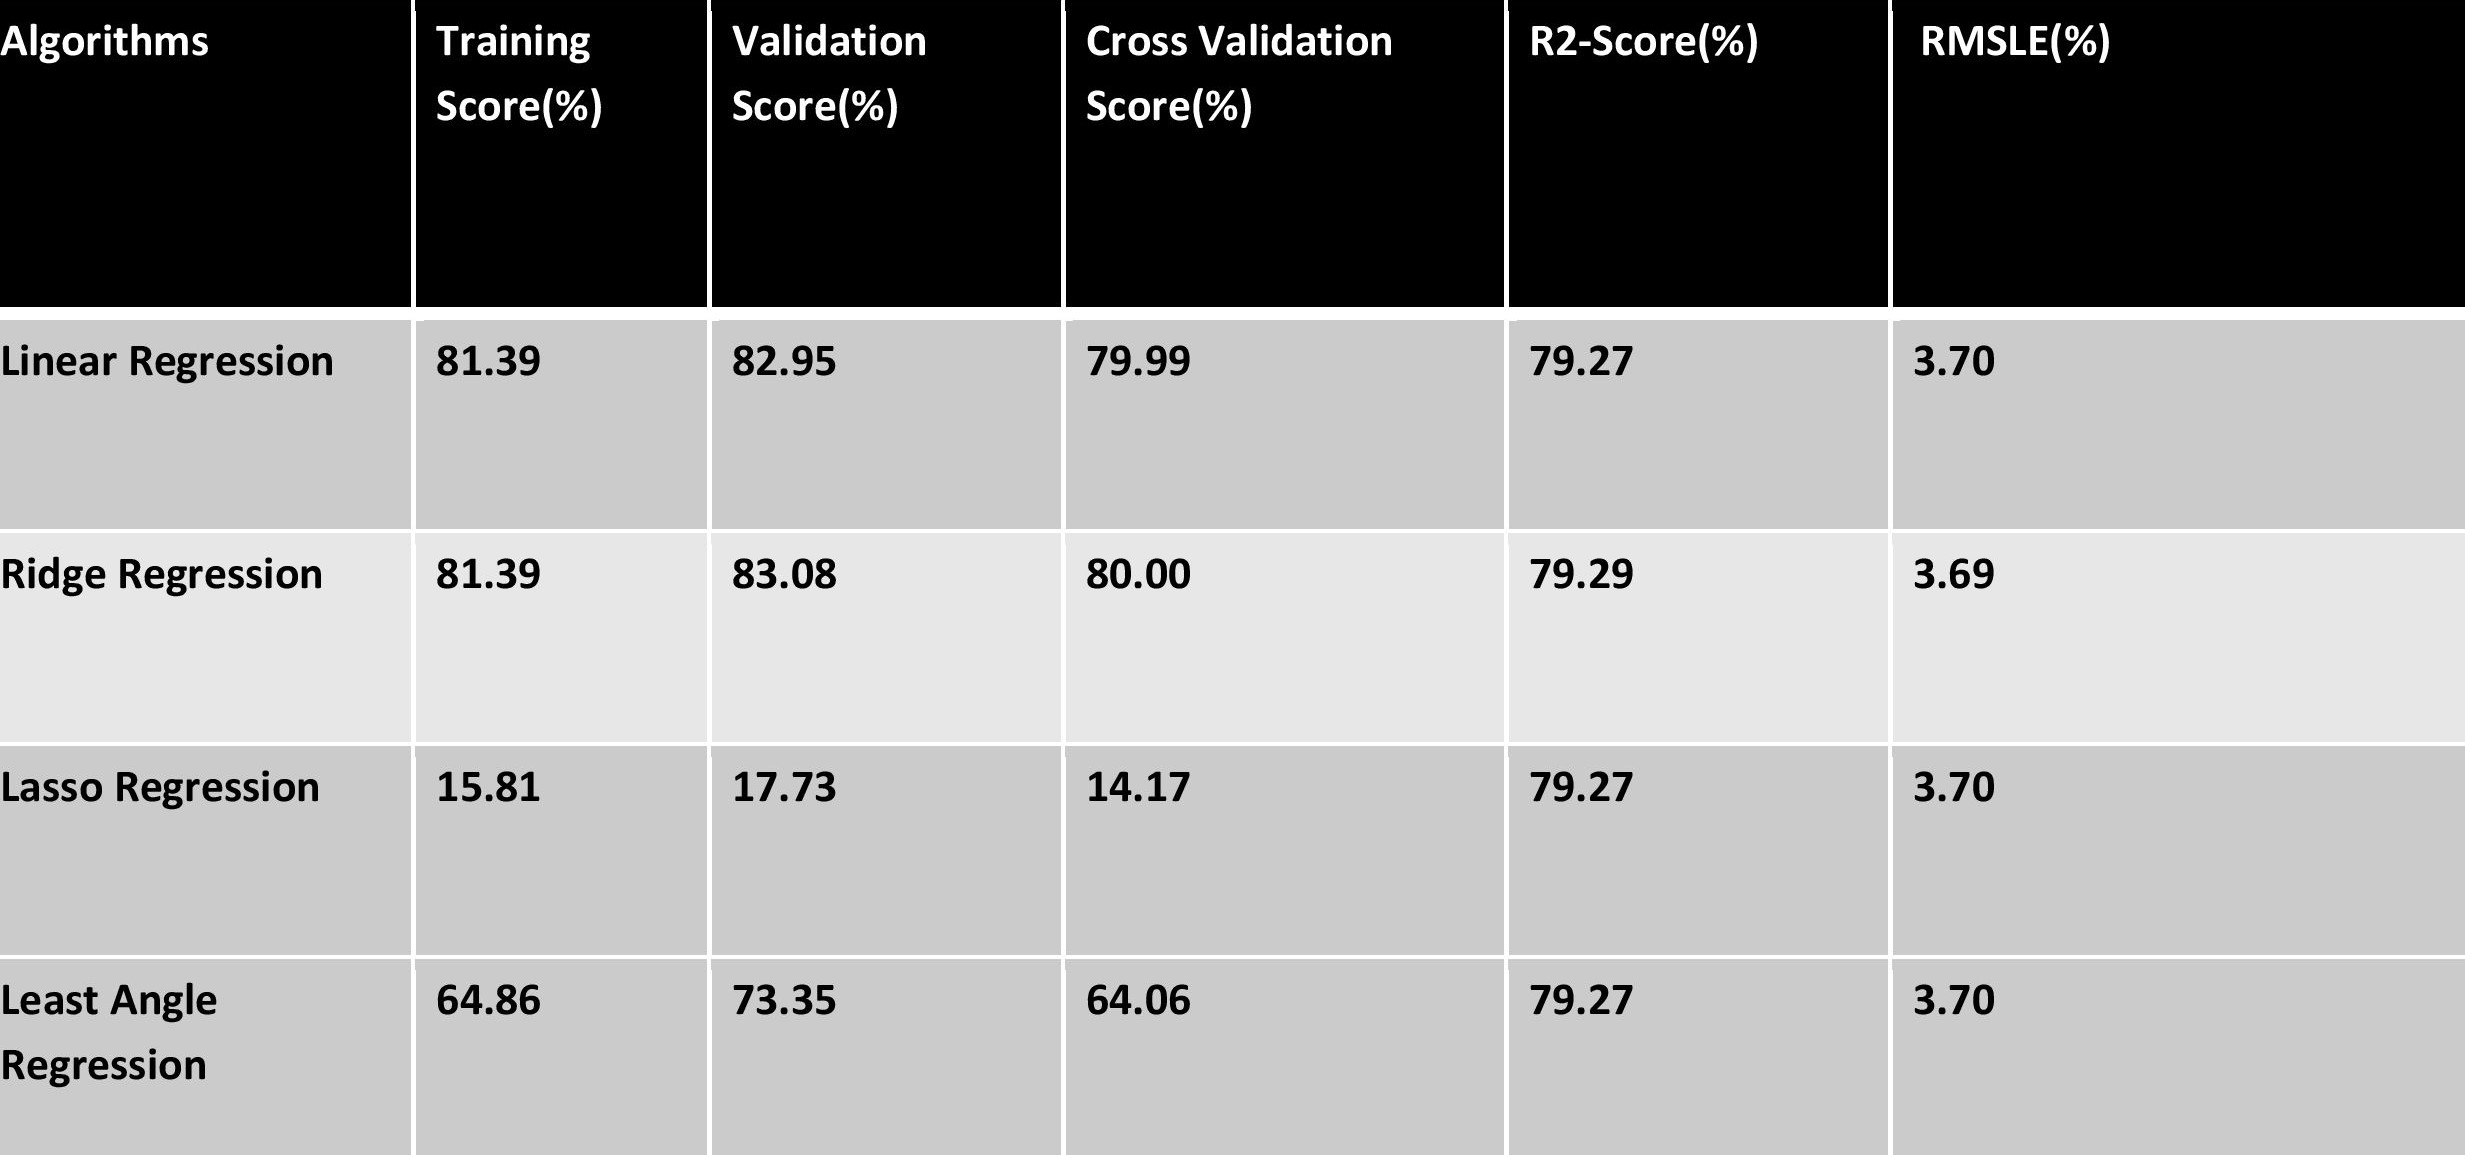